In [69]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [70]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\PESA"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2i.tsv")
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA\myRData"


qualCols = ['Smoke_dummy', 'Caso/control']
quanCols = [
    'Plaque_thickness',
    'Calcium_Score',
    'Plaque_burden',
    'Total_Cholesterol',
    'HDL',
    'LDL',
    'Ox-LDL',
    'Lipoprotein(a)',
    'CRP',
    'Framingham 10y',
    'Framingham 30y',
    'deqage',
    'Systolic Blodd Pressure',
    'Diastolic Blood Pressure'
]

In [71]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col='Seqn')

In [72]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [73]:
#
# Run MOFA
#

# Create data matrix object (without separating by groups)

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    features_names=[xqi.columns, xmi.columns],
    samples_names=[[str(i) for i in seqn]],
    likelihoods=['gaussian', 'gaussian']
)

ent.set_model_options(
    factors = 25, 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_weights = True,
    ard_factors=True
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='q' group='group0' with N=364 samples and D=470 features...
Successfully loaded view='m' group='group0' with N=364 samples and D=1826 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination pri

In [30]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy.hdf5')



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -13257255.59 

Iteration 1: time=1.14, ELBO=-1116446.68, deltaELBO=12140808.904 (91.57859878%), Factors=24
Iteration 2: time=1.19, ELBO=-954680.13, deltaELBO=161766.551 (1.22021145%), Factors=23
Iteration 3: time=0.96, ELBO=-917818.83, deltaELBO=36861.302 (0.27804625%), Factors=22
Iteration 4: time=0.89, ELBO=-899524.24, deltaELBO=18294.590 (0.13799681%), Factors=21
Iteration 5: time=0.79, ELBO=-887390.44, deltaELBO=12133.800 (0.09152573%), Factors=20
Iteration 6: time=0.76, ELBO=-879454.61, deltaELBO=7935.828 (0.05986026%), Factors=19
Iteration 7: time=0.70, ELBO=-874953.87, deltaELBO=4500.744 (0.03394929%), Factors=18
Iteration 8: time=0.66, ELBO=-872086.63, deltaELBO=2867.237 (0.02162768%), Factors=17
Iteration 9: time=0.61, ELBO=-872617.00, deltaELBO=-530.372 (0.00400062%), Factors=16
Warning, lower bound is decreasing...
Iteration 10: time=0

In [74]:
m = mfx.mofa_model('modelpy.hdf5')

In [75]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 364
Features: 2296
Groups of observations: group0
Views: q, m



In [76]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [77]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,12.643047,0.000237
Factor10,2.787048,0.061598
Factor11,2.134333,0.028614
Factor2,0.097461,10.008640
Factor3,8.107004,0.002132
Factor4,7.639914,0.004567
Factor5,4.089577,0.098325
Factor6,3.749208,0.085877
Factor7,3.637697,0.056430


In [78]:
import plotly.express as px
palette = px.colors.qualitative.Plotly

Global Analysis of MOFA

In [79]:
# Variance explained by factors
import re

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')

explVar = explVar.loc[[
    f'Factor{j}'
    for j in 
    np.sort([int(re.search('([0-9]+)', i).groups()[0]) for i in explVar.index])
]]

explVar

View,m,q
Factor,,
Factor1,12.643047,0.000237
Factor2,0.097461,10.008640
Factor3,8.107004,0.002132
Factor4,7.639914,0.004567
Factor5,4.089577,0.098325
Factor6,3.749208,0.085877
Factor7,3.637697,0.056430
Factor8,2.918293,0.206358
Factor9,2.899375,0.101944


In [81]:
#
# Correlation Analysis between Projections and metadata
#

import statsmodels.api as sm
from statsmodels.formula.api import ols


pv = {}
model = {}

for n, nfactor in enumerate(m.get_factors().T):

    pv[n] = {}
    model[n] = {}

    for mdatacol in quanCols:

        # model[n][mdatacol] = sm.OLS(
        #     mdatai[mdatacol],
        #     sm.add_constant(nfactor)
        # ).fit()
        model[n][mdatacol] = sm.OLS(
            nfactor,
            sm.add_constant(mdatai[mdatacol])
        ).fit()

        pv[n][mdatacol] = model[n][mdatacol].pvalues[-1]
    
    for mdatacol in qualCols:
        model[n][mdatacol] = ols(
            'y ~ C(x)', 
            pd.DataFrame({
                'y': nfactor,
                'x': mdatai.loc[:, mdatacol]
            })
        ).fit()

        pv[n][mdatacol] = sm.stats.anova_lm(model[n][mdatacol])['PR(>F)']['C(x)']

pv = pd.DataFrame(pv)
pv.columns = explVar.index
pd.concat([
    explVar.T.round(3),
    pv
])

from statsmodels.stats.multitest import multipletests

pvfdr = pv.copy()
for i in pv.columns:
    pvfdr[i] = multipletests(pvfdr[i], method='fdr_bh')[1]

pd.concat([
    explVar.T.round(3),
    pvfdr
]).round(4)

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11
m,12.6430,0.0970,8.1070,7.6400,4.0900,3.7490,3.6380,2.9180,2.8990,2.7870,2.1340
q,0.0000,10.0090,0.0020,0.0050,0.0980,0.0860,0.0560,0.2060,0.1020,0.0620,0.0290
Plaque_thickness,0.9869,0.0314,0.7439,0.1395,0.4219,0.9329,0.9552,0.8587,0.9638,0.9869,0.6582
Calcium_Score,0.9763,0.1962,0.7439,0.4981,0.8705,0.9329,0.9552,0.9514,0.9638,0.9566,0.5864
Plaque_burden,0.9763,0.0399,0.8081,0.0684,0.8942,0.9329,0.9552,0.9514,0.7137,0.8334,0.8074
Total_Cholesterol,0.9869,0.0168,0.8640,0.0000,0.3185,0.0057,0.9552,0.1550,0.5323,0.7282,0.5672
HDL,0.9087,0.6351,0.7439,0.8446,0.7797,0.9329,0.9552,0.0663,0.9638,0.9566,0.8142
LDL,0.9869,0.0547,0.8640,0.0019,0.3185,0.0097,0.9552,0.9514,0.5323,0.7282,0.5672
Ox-LDL,0.9763,0.0168,0.9352,0.0000,0.3185,0.5518,0.9552,0.0663,0.5323,0.9512,0.5672
Lipoprotein(a),0.7331,0.3587,0.6633,0.4981,0.6056,0.1980,0.9552,0.9514,0.9638,0.9869,0.5672


In [82]:
coefs = pd.DataFrame({i: {j: model[i][j].params[1] for j in model[i]} for i in model})#, columns=explVar.index)
coefs.columns = explVar.index
coefs

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11
Plaque_thickness,0.005721,0.016505,-0.014907,0.029501,0.013757,0.000633,-0.001221,0.007917,-0.002551,0.000228,-0.004539
Calcium_Score,-0.000420,0.000455,-0.000634,0.000679,0.000131,-0.000035,-0.000048,-0.000044,-0.000021,0.000091,-0.000249
Plaque_burden,-0.000542,0.000795,-0.000532,0.002021,0.000070,-0.000153,-0.000051,-0.000060,-0.000339,-0.000394,0.000105
Total_Cholesterol,0.001125,0.004648,0.001470,0.020718,0.004174,0.006597,0.000912,-0.004572,0.002829,0.002956,0.001571
HDL,0.014930,-0.003170,0.011328,-0.004862,-0.004790,0.003982,-0.004915,-0.020764,-0.001515,0.002169,-0.001317
LDL,-0.000098,0.003965,0.001586,0.017119,0.004516,0.006758,0.001901,0.000682,0.003939,0.004009,0.002919
Ox-LDL,-0.004724,0.010216,0.000776,0.043921,0.008926,0.005319,0.000340,-0.012202,0.005108,0.003228,0.003407
Lipoprotein(a),-0.005779,-0.001806,0.007442,-0.003558,-0.002085,0.003861,-0.000098,-0.000135,0.000080,-0.000031,0.002016
CRP,-0.117942,0.102480,-1.303683,1.181292,0.491885,0.446975,-0.359469,0.771844,0.447037,0.187310,0.353559
Framingham 10y,6.890692,3.034817,-5.021274,5.516506,5.181156,-0.316459,0.086261,0.272887,-0.309320,0.291783,-1.453992


Factor Analysis

In [89]:
top = 50
col = 'Factor4'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-1,1), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-1,1), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    #fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

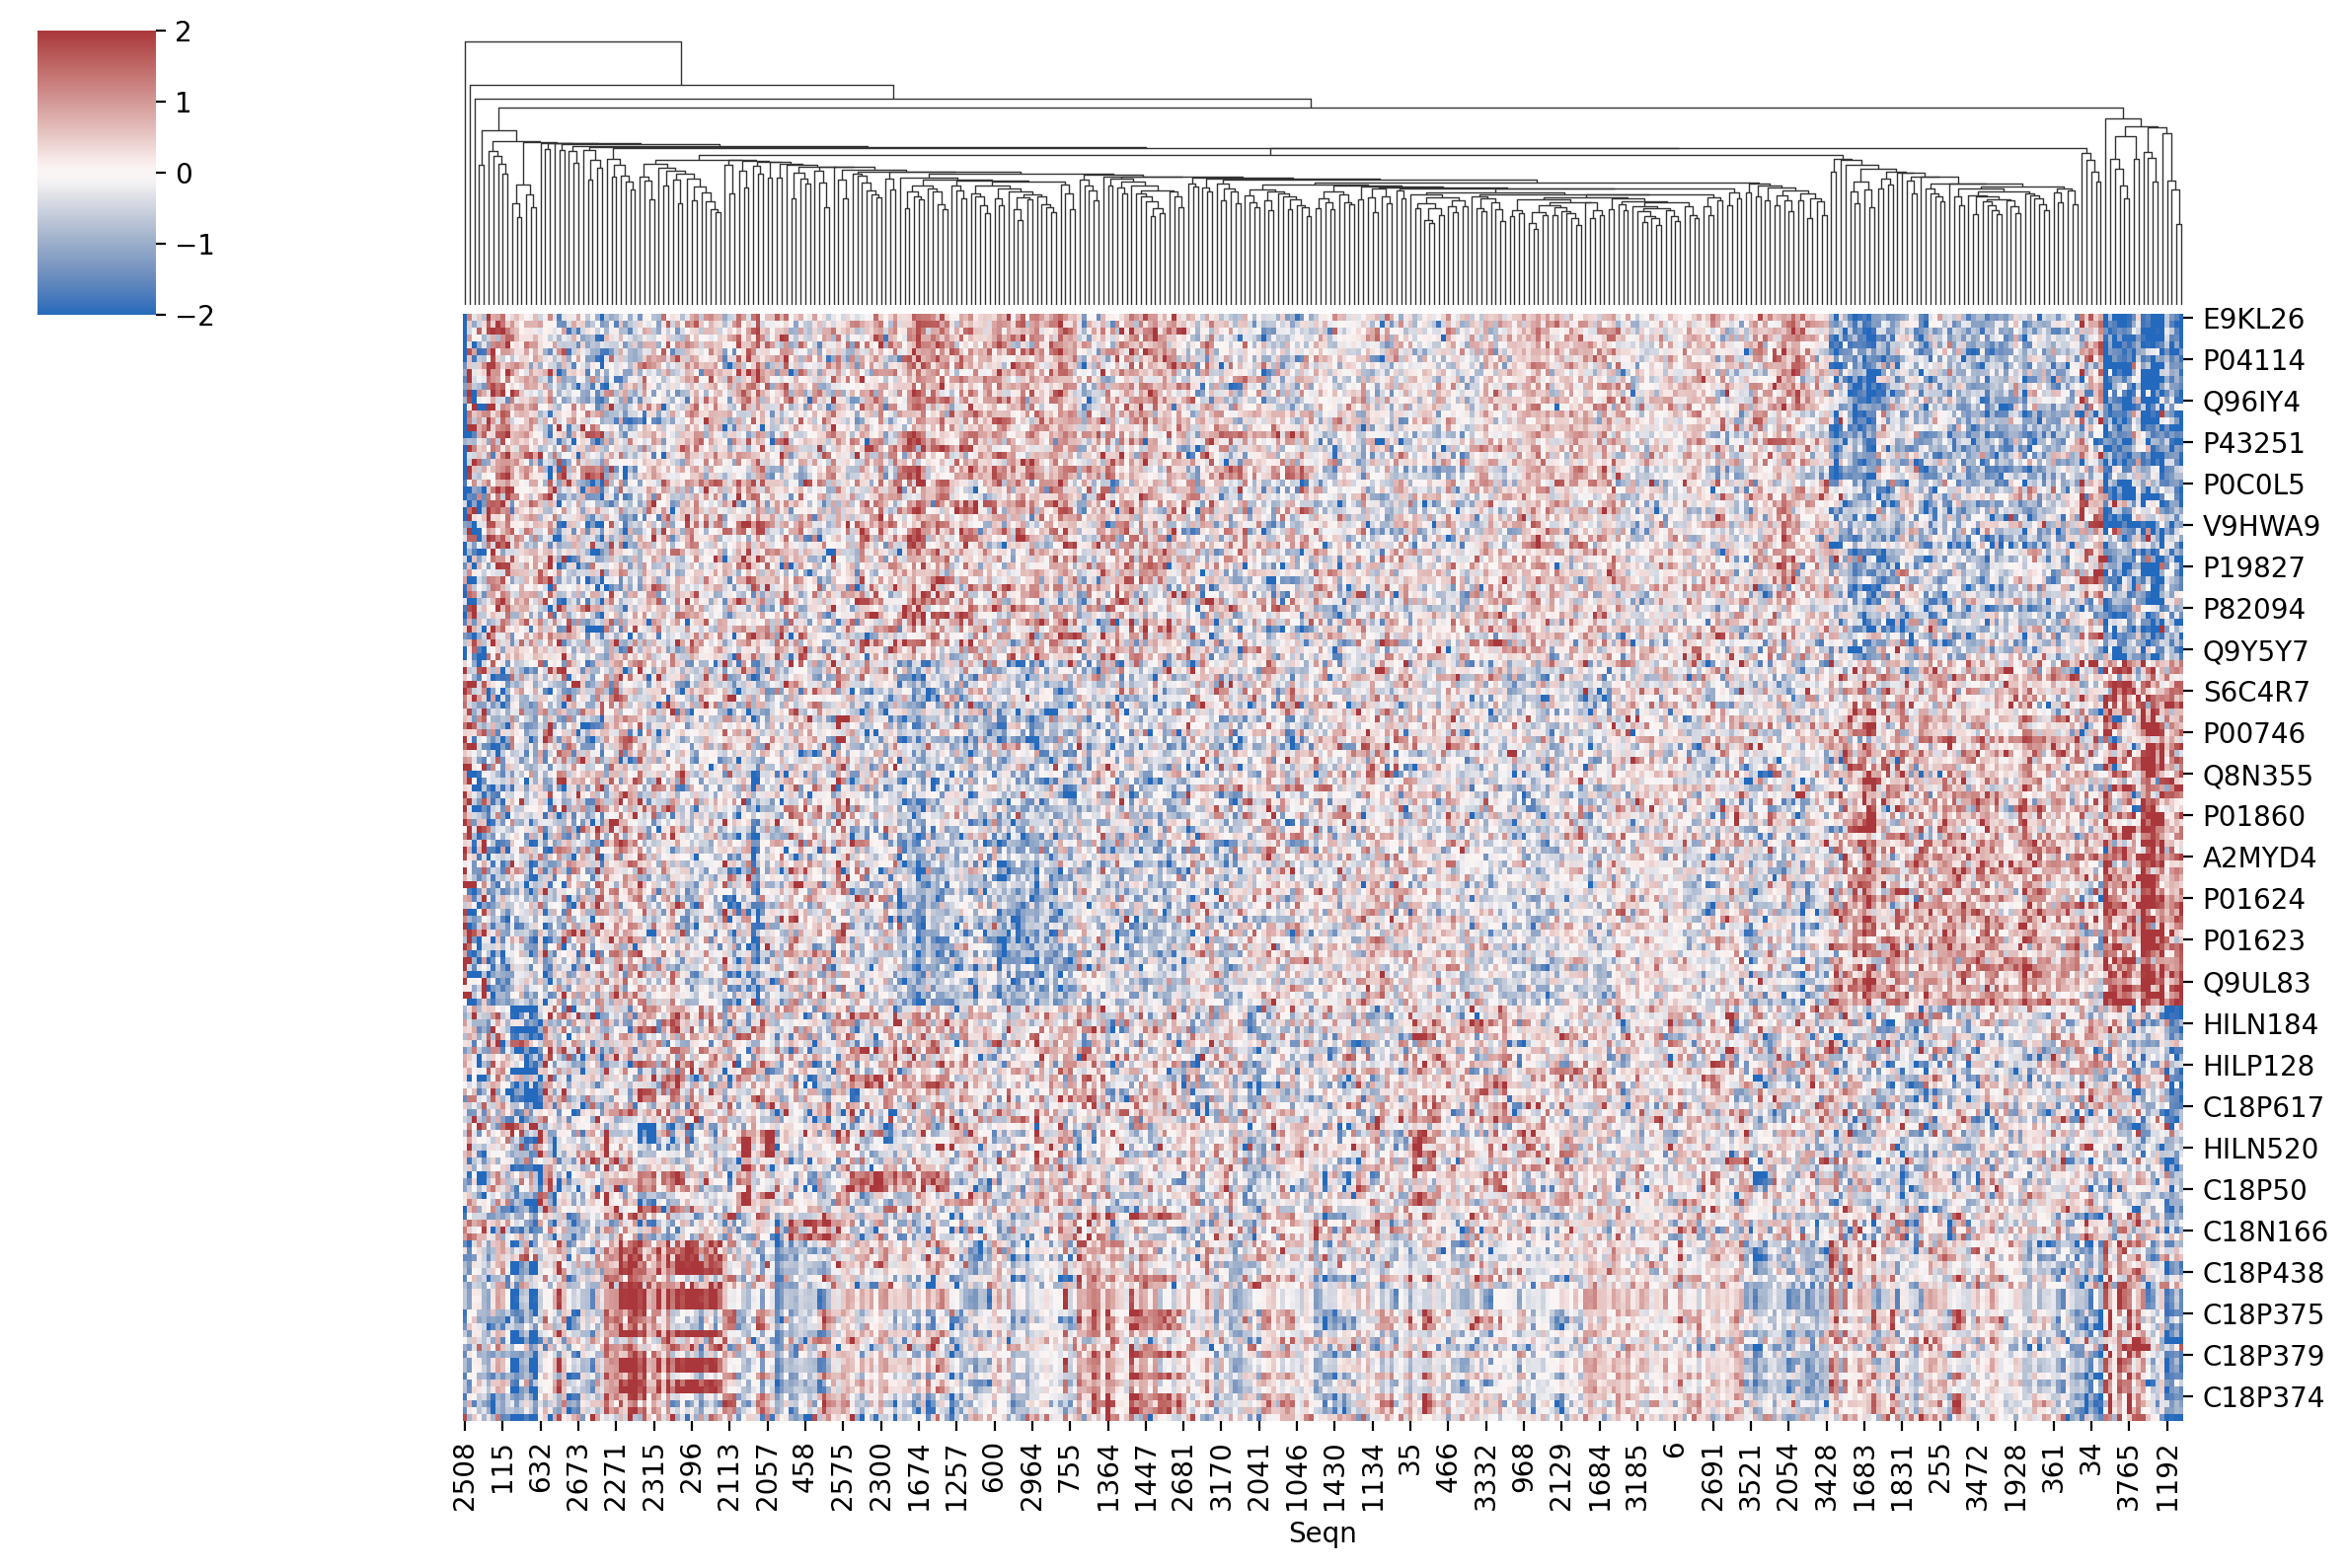

In [84]:
# HEATMAP

#prots = ['P27169','P80108','P02647','P02652']
nqup=50
nqdo=50
nmup=30
nmdo=30

tmp = xqi.loc[
    :, 
    w_all['q'][:nqup].index.tolist()+w_all['q'][-nqdo:].index.tolist()
    ].join(
    xmi.loc[
        :, 
        w_all['m'][:nmup].index.tolist()+w_all['m'][-nmdo:].index.tolist()
        ]
    ).T

hmap = sns.clustermap(
    tmp,
    cmap='vlag', figsize=(12,8), center=0, row_cluster=False, col_cluster=True, vmin=-2, vmax=2)

In [85]:

zz1 = m2i.set_index('fid').loc[w_all['m'][-nmdo:].index]#[['ID', 'Abbrev', 'TP_ID']]
zz1.to_csv(f'Tables/{col}_m_down.tsv', sep='\t')

zz2 = m2i.set_index('fid').loc[w_all['m'][:nmup].index]#[['ID', 'Abbrev', 'TP_ID']]
zz2.to_csv(f'Tables/{col}_m_up.tsv', sep='\t')

zz3 = q2i.set_index('fid').loc[w_all['q'][-nqdo:].index]
zz3.to_csv(f'Tables/{col}_q_down.tsv', sep='\t')

zz4 = q2i.set_index('fid').loc[w_all['q'][:nqup].index]
zz4.to_csv(f'Tables/{col}_q_up.tsv', sep='\t')

In [360]:
tmp = mdatai.loc[mdatai.index[hmap.dendrogram_col.reordered_ind], 'Plaque_thickness']
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[str(i) for i in tmp.index],
    y=tmp, mode='markers'
))

In [709]:
mdatacol = qualCols[1]

# fig = go.Figure()

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==0).sum()*['Control'],
#     y=m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==1).sum()*['Disease'],
#     y=m.get_factors()[mdatai[mdatacol]==1,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

import plotly.figure_factory as ff

hist_data = [
    m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
    m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
]

group_labels = ['Control', 'Disease']
colors = [palette[0], palette[1]]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, curve_type='kde')

# Add title
fig.update_xaxes(range=(-2.5,2.5))
fig.update_layout(title_text=f'{col} distribution per {mdatacol}')
fig.show()

#
# Violin Plot
#

# fig = go.Figure()
# data = [
#     m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
# ]
# # for data_line, color in zip(data, palette[:2]):

# fig.add_trace(go.Violin(x=data[0], line_color=palette[0], opacity=0.5, name='Control'))
# fig.add_trace(go.Violin(x=data[1], line_color=palette[1], opacity=1, name='Disease'))

# fig.update_traces(orientation='h', side='positive', width=100, points=False)
# fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, title=f'{col} distribution per {mdatacol}')
#fig.update_xaxes(range=(-2.2,2.2))
# fig.show()
# # m.get_factors()[mdatai['Caso/control']==0,nfactor-1]


In [711]:
nfactor = 6

fig = go.Figure()

for mdatacol in quanCols:

    fig.add_trace(go.Scatter(
        x=m.get_factors()[:,nfactor-1],
        y=mdatai[mdatacol],
        name=mdatacol, mode='markers', marker_size=2.5
    ))

fig.show()

mdatacol = 'LDL'
fig = px.scatter(
    pd.DataFrame({mdatacol: mdatai[mdatacol], f'Factor {nfactor}': m.get_factors()[:,nfactor-1]}),
    x=f'Factor {nfactor}', y=mdatacol, trendline='ols'
    )

fig.show()

STRING FUNCTIONS

In [16]:
from STRING import Uniprot2String, FunctionalEnrichment

In [17]:
background = Uniprot2String(
    q2i['fid'].tolist()
)

background = [i[1] for i in background]

In [40]:
my_genes = Uniprot2String(
    w_all['q'].index.tolist()[:20]+w_all['q'].index.tolist()[-20:]
)
my_genes = [i[1] for i in my_genes]

In [41]:
data = FunctionalEnrichment(my_genes, background, species=9606)

from io import StringIO

data = pd.read_csv(
    StringIO(data),
    sep='\t'
)

In [20]:
set(data['category'])

{'COMPARTMENTS',
 'Component',
 'Function',
 'HPO',
 'InterPro',
 'KEGG',
 'Keyword',
 'NetworkNeighborAL',
 'PMID',
 'Pfam',
 'Process',
 'RCTM',
 'SMART',
 'TISSUES',
 'WikiPathways'}

In [42]:
col = ['category', 'number_of_genes', 'number_of_genes_in_background', 'fdr', 'description']
categories = ['Process', 'KEGG', 'Component']
data[np.isin(data['category'], categories)].sort_values('fdr').loc[:, col].head(15)

,category,number_of_genes,number_of_genes_in_background,fdr,description
14,Component,18,1021,0.000005,Extracellular space
15,Component,6,25,0.000005,Plasma lipoprotein particle
30,KEGG,5,24,0.000066,Cholesterol metabolism
6,Process,6,29,0.000130,Regulation of plasma lipoprotein particle levels
16,Component,4,13,0.000290,Very-low-density lipoprotein particle
7,Process,5,24,0.001300,Plasma lipoprotein particle organization
17,Component,4,23,0.001600,High-density lipoprotein particle
8,Process,4,13,0.003300,Plasma lipoprotein particle clearance
9,Process,4,18,0.008000,Plasma lipoprotein particle remodeling
10,Process,4,24,0.013700,Response to ethanol


In [43]:
import requests

res = requests.get(
    f'https://string-db.org/api/tsv/get_link?identifiers={"%0d".join(my_genes)}&species=9606'
    )

print(res.content.decode('ascii'))

url
https://string-db.org/cgi/link?to=0F47D573EC7D5855

